In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/Mall_Customers.csv')
df.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [ ]:
new_df=df.drop(['CustomerID'],axis=1)
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
#check null values
new_df.isnull().sum()

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [ ]:
#descriptive statistics
new_df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#Visualization

In [ ]:
import seaborn as sns


<ipython-input-35-d5c391439cd0>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df.Age)


<Axes: xlabel='Age', ylabel='Density'>

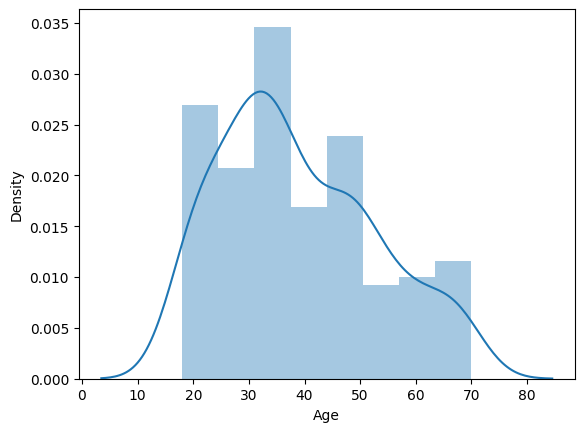

In [ ]:
#1)univariate analysis
sns.distplot(new_df.Age)

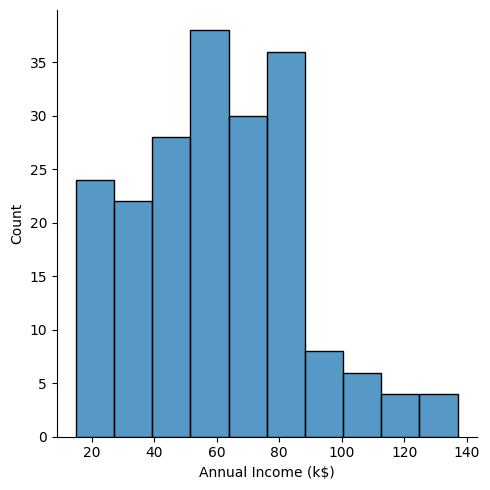

In [ ]:
sns.displot(new_df['Annual Income (k$)'])

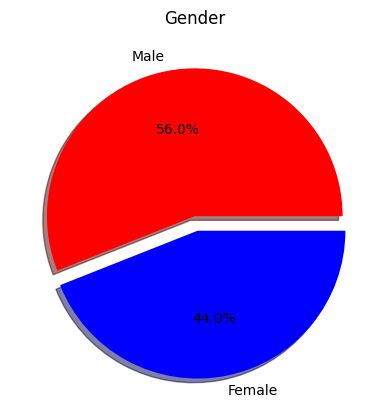

In [ ]:
import matplotlib.pyplot as plt
plt.pie(new_df.Gender.value_counts(),[0,0.1],labels=['Male','Female'],autopct='%1.1f%%',shadow=True,colors=['r','b'])
plt.title('Gender')
plt.show()

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

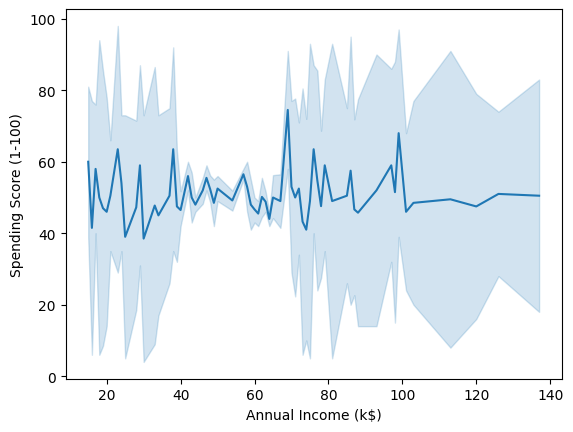

In [ ]:
#bivariate
sns.lineplot(x=new_df['Annual Income (k$)'],y=new_df[''])

<Axes: xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

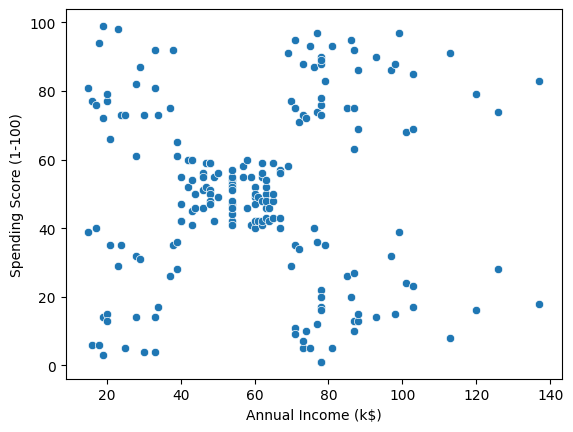

In [ ]:
sns.scatterplot(x=new_df['Annual Income (k$)'],y=new_df['Spending Score (1-100)'])

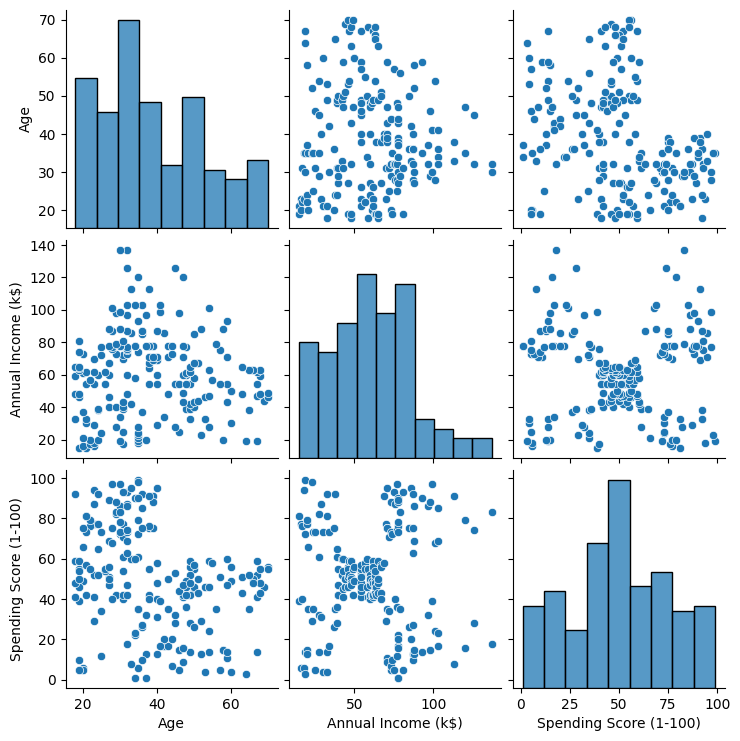

In [ ]:
#multivariate
sns.pairplot(new_df)

<ipython-input-42-1160473d9951>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(new_df.corr(),annot=True)


<Axes: >

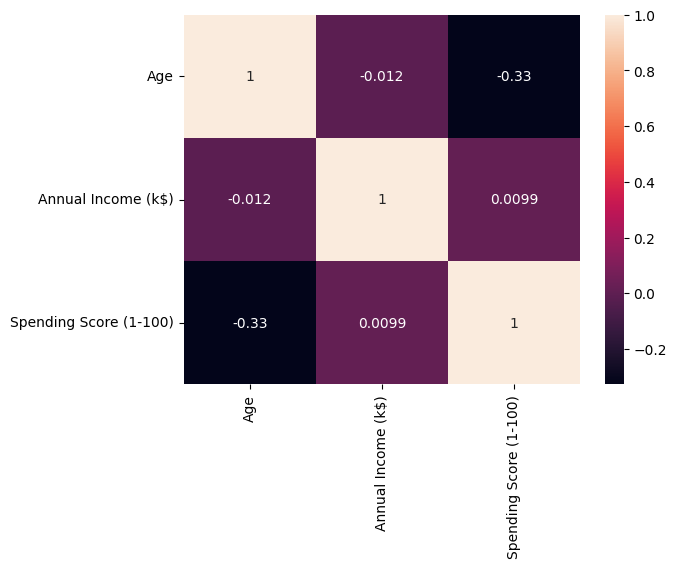

In [ ]:
sns.heatmap(new_df.corr(),annot=True)

#outlier detection(by using box graph)

<Axes: >

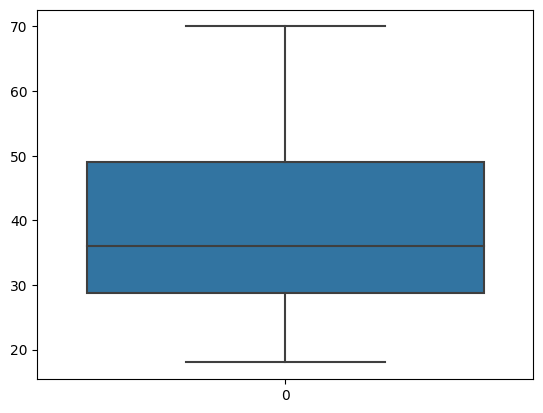

In [ ]:
sns.boxplot(new_df.Age)

<Axes: >

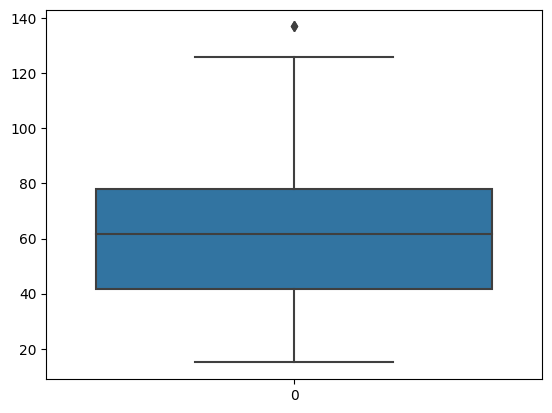

In [ ]:
sns.boxplot(new_df['Annual Income (k$)'])

In [ ]:
new_df['Annual Income (k$)'].median()

61.5

<Axes: >

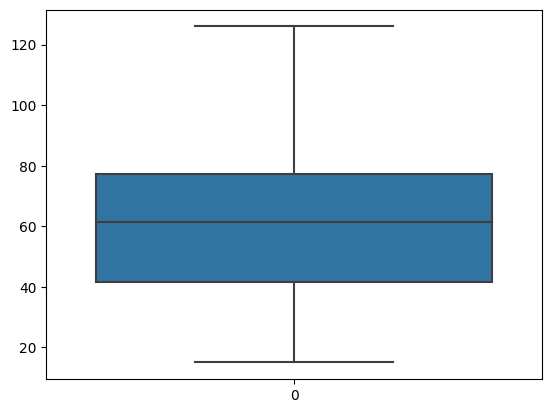

In [ ]:
q1=new_df['Annual Income (k$)'].quantile(0.25)
q3=new_df['Annual Income (k$)'].quantile(0.75)
iqr=q3-q1
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>upper_limit,61.5,df['Annual Income (k$)'])
sns.boxplot(df['Annual Income (k$)'])

<Axes: >

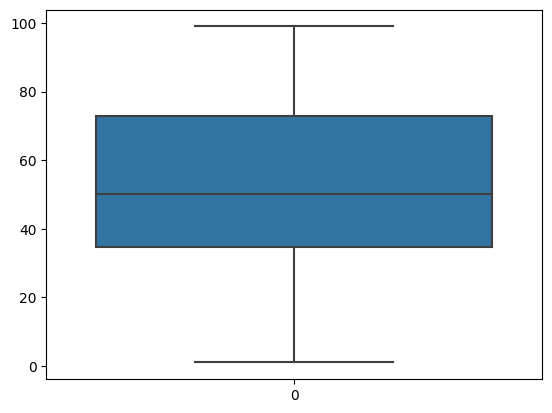

In [ ]:
sns.boxplot(new_df['Spending Score (1-100)'])

#Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [ ]:
new_df.Gender=le.fit_transform(new_df.Gender)

In [ ]:
new_df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40


#Kmeans model building

In [ ]:
from sklearn import cluster

In [ ]:
error=[]
for i in range(1,11):
  kmeans = cluster.KMeans(n_clusters=i,init = 'k-means++',random_state=0)
  kmeans.fit(new_df)
  error.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [ ]:
error

[308862.06000000006,
 212889.44245524303,
 143391.59236035676,
 104414.67534220168,
 75399.61541401484,
 58348.641363315044,
 51132.703212576904,
 44392.11566567935,
 41000.8742213207,
 37649.69225429742]

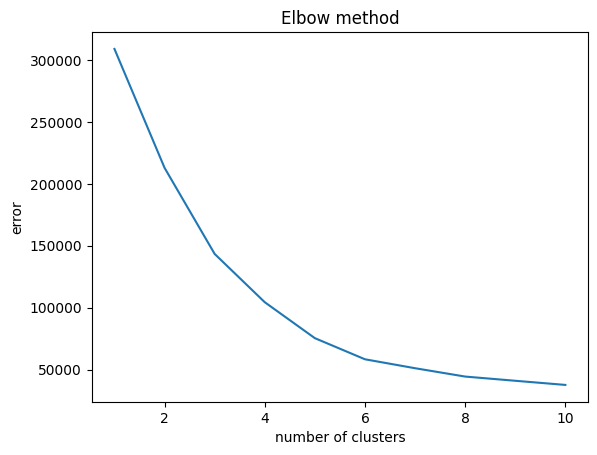

In [ ]:
plt.plot(range(1,11),error)
plt.title('Elbow method')
plt.xlabel('number of clusters')
plt.ylabel('error')
plt.show()

In [ ]:
km_model = cluster.KMeans(n_clusters=5,init = 'k-means++',random_state=0)

In [ ]:
km_model.fit(new_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [ ]:
pred = km_model.predict(new_df)
pred

array([0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4, 0, 4,
       0, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 3, 1, 2, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 2, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [ ]:
# Test the model with random observation

km_model.predict([[1,28,15,79]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [ ]:
km_model.predict([[0,22,17,40]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

In [ ]:
km_model.predict([[0,25,15,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)

In [ ]:
km_model.predict([[1,31,16,70]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([4], dtype=int32)